In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./cwru_train.csv',header=None)
df_test = pd.read_csv('./cwru_test.csv',header=None)
df = pd.concat([df_train, df_test], axis=0)
df.shape

(28000, 785)

In [3]:
all_data = df.to_numpy()
all_data.shape

(28000, 785)

In [4]:
X = all_data[:, 1:]
y = all_data[:, 0]
X.shape, y.shape

((28000, 784), (28000,))

<BarContainer object of 10 artists>

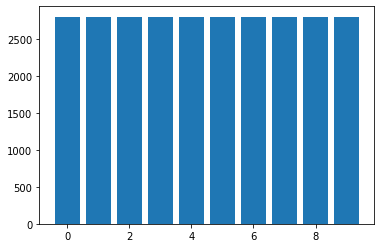

In [5]:
data_by_label = {}
for i in set(y):
    data_by_label[i] = []
for i, item in enumerate(y):
    data_by_label[item].append(X[i].tolist())

plt.bar(x=list(data_by_label.keys()), height=[len(data_by_label[key]) for key in data_by_label.keys()])

In [9]:
NUM_USER = 10
NUM_LABEL_PER_USER = 10
NUM_LABEL = 10
INTERVAL = int(NUM_USER*NUM_LABEL_PER_USER/NUM_LABEL)
INTERVAL

10

In [10]:
np.random.seed(1)
range_in_label = []

for i in range(NUM_LABEL):
    tmp = []
    total = len(data_by_label[i])
    for j in range(INTERVAL-1):
        val = np.random.randint(total//(INTERVAL + 1), total//2)
        tmp.append(val)
        total -= val
    tmp.append(total)
    range_in_label.append(tmp)

range_in_label

[[1315, 370, 497, 128, 181, 103, 23, 80, 25, 78],
 [383, 1191, 182, 331, 345, 53, 129, 34, 33, 119],
 [1161, 401, 602, 213, 195, 34, 67, 15, 33, 79],
 [1255, 643, 434, 128, 167, 22, 74, 29, 5, 43],
 [570, 411, 429, 557, 196, 87, 121, 170, 93, 166],
 [769, 976, 138, 159, 94, 169, 160, 71, 106, 158],
 [269, 426, 216, 538, 593, 350, 190, 41, 25, 152],
 [1253, 266, 395, 436, 195, 60, 74, 30, 16, 75],
 [1005, 250, 383, 453, 138, 241, 76, 55, 41, 158],
 [949, 489, 492, 412, 44, 165, 99, 19, 63, 68]]

In [11]:
flag = True
for i in range_in_label[1]:
    if flag:
        flag=False
        continue
    for j in range_in_label[2]:
        print(f"{i} + {j} = {i+j}")
    print()

1191 + 1161 = 2352
1191 + 401 = 1592
1191 + 602 = 1793
1191 + 213 = 1404
1191 + 195 = 1386
1191 + 34 = 1225
1191 + 67 = 1258
1191 + 15 = 1206
1191 + 33 = 1224
1191 + 79 = 1270

182 + 1161 = 1343
182 + 401 = 583
182 + 602 = 784
182 + 213 = 395
182 + 195 = 377
182 + 34 = 216
182 + 67 = 249
182 + 15 = 197
182 + 33 = 215
182 + 79 = 261

331 + 1161 = 1492
331 + 401 = 732
331 + 602 = 933
331 + 213 = 544
331 + 195 = 526
331 + 34 = 365
331 + 67 = 398
331 + 15 = 346
331 + 33 = 364
331 + 79 = 410

345 + 1161 = 1506
345 + 401 = 746
345 + 602 = 947
345 + 213 = 558
345 + 195 = 540
345 + 34 = 379
345 + 67 = 412
345 + 15 = 360
345 + 33 = 378
345 + 79 = 424

53 + 1161 = 1214
53 + 401 = 454
53 + 602 = 655
53 + 213 = 266
53 + 195 = 248
53 + 34 = 87
53 + 67 = 120
53 + 15 = 68
53 + 33 = 86
53 + 79 = 132

129 + 1161 = 1290
129 + 401 = 530
129 + 602 = 731
129 + 213 = 342
129 + 195 = 324
129 + 34 = 163
129 + 67 = 196
129 + 15 = 144
129 + 33 = 162
129 + 79 = 208

34 + 1161 = 1195
34 + 401 = 435
34 + 602 = 636

In [12]:
np.random.seed(10)
all_user = {}
flag1 = [0]*NUM_LABEL
flag2 = [0]*NUM_LABEL
available_label = set(list(range(NUM_LABEL)))

for i in range(NUM_USER):
    all_user[str(i)] = {}
    
    labels = np.random.choice(a=list(available_label), size=(NUM_LABEL_PER_USER,), replace=False)
    for label in labels:
        tmp = flag1[label]
        tmp_ = tmp + range_in_label[label][flag2[label]]
        all_user[str(i)][int(label)] = data_by_label[label][tmp:tmp_]
        flag1[label] = tmp_
        flag2[label] += 1
        if flag2[label] == INTERVAL:
            available_label.remove(label)

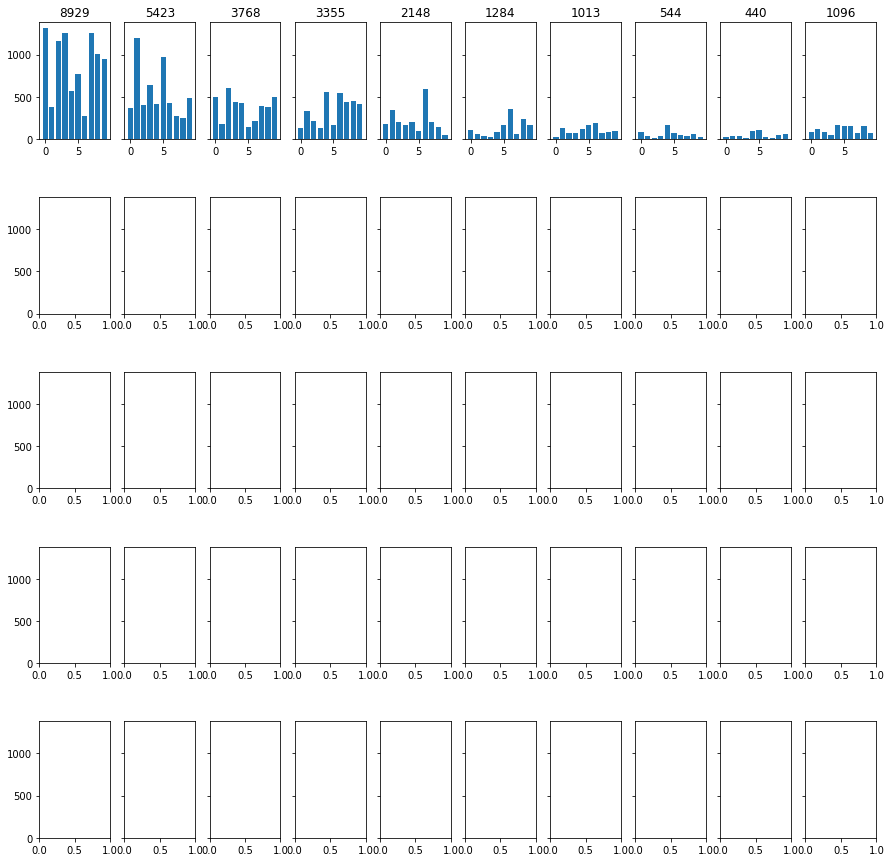

In [17]:
def check(all_client):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
    fig.subplots_adjust(hspace=0.5)

    for i, key in enumerate(all_client.keys()):
#         print(key, len(all_client[key]))
#         for j in all_client[key].keys():
#             print(f'{j}: {len(all_client[key][j])}', end=' ')
#         print('\n')

        x = list(all_client[key].keys())
        y = [len(all_client[key][t]) for t in all_client[key].keys()]
        axes[int(i/10), int(i % 10)].bar(x=x, height=y)
        axes[int(i/10), int(i%10)].set_title(sum(y))

check(all_user)

In [18]:
def write_to_file(client_dict: dict):
    all_train_data = {}
    all_test_data = {}

    users = list(client_dict.keys())
    all_train_data['users'] = users
    all_test_data['users'] = users

    num_train_samples = []
    num_test_samples = []
    train_user_data = {}
    test_user_data = {}
    for user in users:
        train_user_data[user] = {}
        test_user_data[user] = {}

        train_user_data[user]['x'] = []
        train_user_data[user]['y'] = []
        test_user_data[user]['x'] = []
        test_user_data[user]['y'] = []

        for key in client_dict[user].keys():
            len_x = len(client_dict[user][key])
            p = int(0.75*len_x)

            train_user_data[user]['x'].extend(client_dict[user][key][:p])
            train_user_data[user]['y'].extend([key]*p)

            test_user_data[user]['x'].extend(client_dict[user][key][p:])
            test_user_data[user]['y'].extend([key]*(len_x - p))

        num_train_samples.append(len(train_user_data[user]['y']))
        num_test_samples.append(len(test_user_data[user]['y']))

    all_train_data['num_samples'] = num_train_samples
    all_test_data['num_samples'] = num_test_samples
    all_train_data['user_data'] = train_user_data
    all_test_data['user_data'] = test_user_data

    with open('./train_json_iid/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
    with open('./test_json_iid/test.json', 'w') as outfile:
        json.dump(all_test_data, outfile)

write_to_file(all_user)